# Data cleaning

step 1: install pandas

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


step 2: read dataframe

In [34]:
import pandas as pd
df=pd.read_csv('wikileaks_parsed.csv')


first 5 data

In [51]:
df.head()

,PDF Path,Text
0,1.pdf,Pristina Airport – Possible administrative irr...
1,1.pdf,Investigative details\n\nIn his/her interviews...
2,10.pdf,"""An interoffice memorandum providing an “outst..."
3,10.pdf,"""Allegation 2 & 3:\n\n(Specifically, three of ..."
4,10.pdf,"""When asked about this in interview, the Divis..."


get Text column

In [53]:
df = df.drop('PDF Path', axis=1)

In [54]:
df.head()

,Text
0,Pristina Airport – Possible administrative irr...
1,Investigative details\n\nIn his/her interviews...
2,"""An interoffice memorandum providing an “outst..."
3,"""Allegation 2 & 3:\n\n(Specifically, three of ..."
4,"""When asked about this in interview, the Divis..."


In [55]:
df.shape

(143, 1)

In [56]:
display(df)

,Text
0,Pristina Airport – Possible administrative irr...
1,Investigative details\n\nIn his/her interviews...
2,"""An interoffice memorandum providing an “outst..."
3,"""Allegation 2 & 3:\n\n(Specifically, three of ..."
4,"""When asked about this in interview, the Divis..."
...,...
138,"""Description\n\nTop Secret US National Securit..."
139,"""INTRODUCTION\n\nThis case arises out of an au..."
140,"""BACKGROUND INFORMATION\n\nPristina Internatio..."
141,"""BACKGROUND INFORMATION\n\nPristina Internatio..."


143 rows of text

Step 4: check duplicates

In [58]:
df=df.drop_duplicates()

In [59]:
df.shape

(143, 1)

In [60]:
display(df)

,Text
0,Pristina Airport – Possible administrative irr...
1,Investigative details\n\nIn his/her interviews...
2,"""An interoffice memorandum providing an “outst..."
3,"""Allegation 2 & 3:\n\n(Specifically, three of ..."
4,"""When asked about this in interview, the Divis..."
...,...
138,"""Description\n\nTop Secret US National Securit..."
139,"""INTRODUCTION\n\nThis case arises out of an au..."
140,"""BACKGROUND INFORMATION\n\nPristina Internatio..."
141,"""BACKGROUND INFORMATION\n\nPristina Internatio..."


no duplicate in dataset

remove similar

In [62]:

import textdistance



# Calculate similarities between rows
# and save corresponding indexes in a new column "match"
df["match"] = df["Text"].map(
    lambda x: [
        i
        for i, text in enumerate(df["Text"])
        if textdistance.jaro_winkler(x, text) >= 0.9
    ]
)

# Iterate to remove similar rows (keeping only the first one)
indices = []
for i, row in df.iterrows():
    indices.append(i)
    df = df.drop(
        index=[item for item in row["match"] if item not in indices], errors="ignore"
    )

# Clean up
df = df.drop(columns="match")

print(df)

                                                  Text
0    Pristina Airport – Possible administrative irr...
1    Investigative details\n\nIn his/her interviews...
2    "An interoffice memorandum providing an “outst...
3    "Allegation 2 & 3:\n\n(Specifically, three of ...
4    "When asked about this in interview, the Divis...
..                                                 ...
137  "Sensitive Issues on the Agenda When French, U...
138  "Description\n\nTop Secret US National Securit...
139  "INTRODUCTION\n\nThis case arises out of an au...
140  "BACKGROUND INFORMATION\n\nPristina Internatio...
142  "Description\n\nInterception of French Ambassa...

[135 rows x 1 columns]


In [63]:
unique_textdf=df['Text']

check null values

In [67]:
unique_textdf.isnull().sum()

0

no null

remove symbols

In [68]:
pattern = r'[^\w\s]'
updated_texdf= unique_textdf.replace(pattern, '', regex=True)

# Print the updated DataFrame
print(updated_texdf)

0      Pristina Airport  Possible administrative irre...
1      Investigative details\n\nIn hisher interviews ...
2      An interoffice memorandum providing an outstan...
3      Allegation 2  3\n\nSpecifically three of the p...
4      When asked about this in interview the Divisio...
                             ...                        
137    Sensitive Issues on the Agenda When French US ...
138    Description\n\nTop Secret US National Security...
139    INTRODUCTION\n\nThis case arises out of an aud...
140    BACKGROUND INFORMATION\n\nPristina Internation...
142    Description\n\nInterception of French Ambassad...
Name: Text, Length: 135, dtype: object


remove \n

In [69]:
pattern = r'[^\w\s]'
updated_texdf= updated_texdf.replace('\n', ' ', regex=True)

# Print the updated DataFrame
print(updated_texdf)

0      Pristina Airport  Possible administrative irre...
1      Investigative details  In hisher interviews co...
2      An interoffice memorandum providing an outstan...
3      Allegation 2  3  Specifically three of the per...
4      When asked about this in interview the Divisio...
                             ...                        
137    Sensitive Issues on the Agenda When French US ...
138    Description  Top Secret US National Security A...
139    INTRODUCTION  This case arises out of an audit...
140    BACKGROUND INFORMATION  Pristina International...
142    Description  Interception of French Ambassador...
Name: Text, Length: 135, dtype: object


lower case

In [70]:
lower_textdf=  updated_texdf.str.lower()
lower_textdf.describe

<bound method NDFrame.describe of 0      pristina airport  possible administrative irre...
1      investigative details  in hisher interviews co...
2      an interoffice memorandum providing an outstan...
3      allegation 2  3  specifically three of the per...
4      when asked about this in interview the divisio...
                             ...                        
137    sensitive issues on the agenda when french us ...
138    description  top secret us national security a...
139    introduction  this case arises out of an audit...
140    background information  pristina international...
142    description  interception of french ambassador...
Name: Text, Length: 135, dtype: object>

remove number

In [71]:
no_textdf = lower_textdf.str.replace('\d+', '')
no_textdf.describe

C:\Users\Admin\AppData\Local\Temp\ipykernel_15296\3111803584.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  no_textdf = lower_textdf.str.replace('\d+', '')


<bound method NDFrame.describe of 0      pristina airport  possible administrative irre...
1      investigative details  in hisher interviews co...
2      an interoffice memorandum providing an outstan...
3      allegation     specifically three of the perso...
4      when asked about this in interview the divisio...
                             ...                        
137    sensitive issues on the agenda when french us ...
138    description  top secret us national security a...
139    introduction  this case arises out of an audit...
140    background information  pristina international...
142    description  interception of french ambassador...
Name: Text, Length: 135, dtype: object>

In [75]:
# # Using pd.DataFrame()
# df1 = pd.DataFrame(no_textdf)

# # Display the DataFrame
# print(df1)

                                                  Text
0    pristina airport  possible administrative irre...
1    investigative details  in hisher interviews co...
2    an interoffice memorandum providing an outstan...
3    allegation     specifically three of the perso...
4    when asked about this in interview the divisio...
..                                                 ...
137  sensitive issues on the agenda when french us ...
138  description  top secret us national security a...
139  introduction  this case arises out of an audit...
140  background information  pristina international...
142  description  interception of french ambassador...

[135 rows x 1 columns]


token

In [87]:
from nltk.tokenize import word_tokenize

tokenizedf = no_textdf.apply(word_tokenize)
tokenizedf.head()

0    [pristina, airport, possible, administrative, ...
1    [investigative, details, in, hisher, interview...
2    [an, interoffice, memorandum, providing, an, o...
3    [allegation, specifically, three, of, the, per...
4    [when, asked, about, this, in, interview, the,...
Name: Text, dtype: object

In [92]:
tokenizedf.describe

<bound method NDFrame.describe of 0      [pristina, airport, possible, administrative, ...
1      [investigative, details, in, hisher, interview...
2      [an, interoffice, memorandum, providing, an, o...
3      [allegation, specifically, three, of, the, per...
4      [when, asked, about, this, in, interview, the,...
                             ...                        
137    [sensitive, issues, on, the, agenda, when, fre...
138    [description, top, secret, us, national, secur...
139    [introduction, this, case, arises, out, of, an...
140    [background, information, pristina, internatio...
142    [description, interception, of, french, ambass...
Name: Text, Length: 135, dtype: object>

In [107]:
def flat(lis):
    flatList = []
    # Iterate with outer list
    for element in lis:
        if type(element) is list:
            # Check if type is list than iterate through the sublist
            for item in element:
                flatList.append(item)
        else:
            flatList.append(element)
    return flatList
 
 

single_listdf=flat(tokenizedf)

remove stopwords

In [94]:
pip install nltk
nltk.download('stopwords')

Note: you may need to restart the kernel to use updated packages.


In [98]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [110]:
filtered_sent=[]
for w in single_listdf:
    w = w.lower()
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenizedf)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: 0      [pristina, airport, possible, administrative, ...
1      [investigative, details, in, hisher, interview...
2      [an, interoffice, memorandum, providing, an, o...
3      [allegation, specifically, three, of, the, per...
4      [when, asked, about, this, in, interview, the,...
                             ...                        
137    [sensitive, issues, on, the, agenda, when, fre...
138    [description, top, secret, us, national, secur...
139    [introduction, this, case, arises, out, of, an...
140    [background, information, pristina, internatio...
142    [description, interception, of, french, ambass...
Name: Text, Length: 135, dtype: object
Filterd Sentence: ['pristina', 'airport', 'possible', 'administrative', 'irregularity', 'regarding', 'tender', 'procedures', 'involving', 'vendor', 'vendor', 'allegation', 'two', 'companies', 'owner', 'took', 'part', 'least', 'three', 'times', 'airport', 'tenders', 'background', 'information', 'kosovo', 'citizen'

stem

In [111]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
stemmed_words=[]
for w in filtered_sent:
 stemmed_words.append(porter_stemmer.stem(w))
print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)


Filtered Sentence: ['pristina', 'airport', 'possible', 'administrative', 'irregularity', 'regarding', 'tender', 'procedures', 'involving', 'vendor', 'vendor', 'allegation', 'two', 'companies', 'owner', 'took', 'part', 'least', 'three', 'times', 'airport', 'tenders', 'background', 'information', 'kosovo', 'citizen', 'vendor', 'vendor', 'representative', 'owner', 'director', 'pristinabased', 'vendor', 'also', 'shareholder', 'pristinaljubljanabased', 'company', 'vendor', 'companies', 'residences', 'address', 'pristina', 'vendor', 'vendor', 'submitted', 'three', 'times', 'tenders', 'supply', 'mounting', 'sonic', 'system', 'fire', 'station', 'building', 'winner', 'vendor', 'followed', 'vendor', 'third', 'company', 'vendor', 'provide', 'price', 'offer', 'cabling', 'flat', 'display', 'information', 'system', 'fids', 'winner', 'vendor', 'followed', 'vendor', 'two', 'competitors', 'vendor', 'vendor', 'offered', 'prices', 'euro', 'euro', 'purchase', 'fixing', 'cramer', 'antenna', 'winner', 'vend

In [112]:
from nltk.probability import FreqDist


all_words_frequency = FreqDist(filtered_sent)
print (all_words_frequency)


<FreqDist with 2887 samples and 12657 outcomes>


In [113]:
# print 10 most frequently occurring words
print ("\nTop 10 most frequently occurring words")
print (all_words_frequency.most_common(10))
# print 10 least frequently occurring words
print ("\nTop 10 least frequently occurring words")
print (all_words_frequency.most_common()[-10:])



Top 10 most frequently occurring words
[('official', 194), ('airport', 192), ('staff', 148), ('vendor', 125), ('pristina', 113), ('officer', 112), ('procurement', 104), ('member', 92), ('heshe', 91), ('atcs', 82)]

Top 10 least frequently occurring words
[('acts', 1), ('envoy', 1), ('release', 1), ('jean', 1), ('david', 1), ('respond', 1), ('misuse', 1), ('iraqi', 1), ('regime', 1), ('backing', 1)]


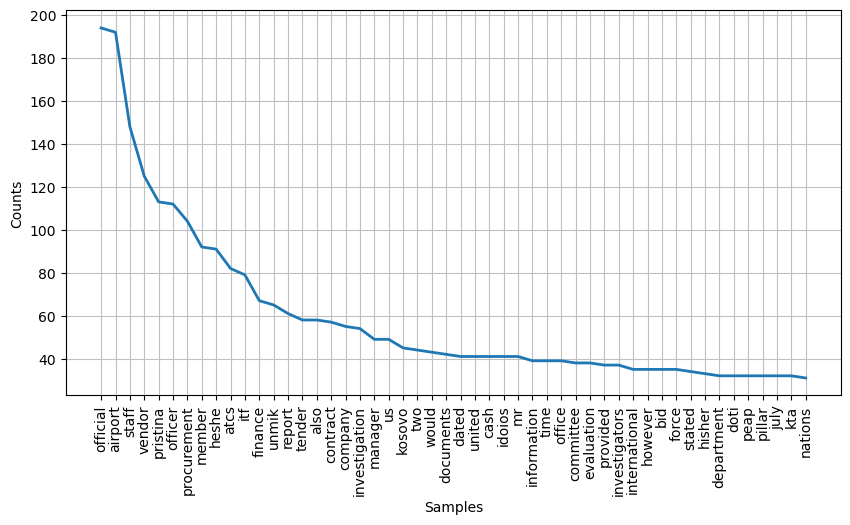

In [114]:

def plot_frequency(freq):
 plt.figure(figsize=(10,5))
 freq.plot(50, cumulative=False)
 plt.show()

import matplotlib.pyplot as plt
all_words_clean_frequency = FreqDist(filtered_sent)
plot_frequency(all_words_clean_frequency)


wordcloud

In [116]:
pip install WordCloud

     -------------------------------------- 300.4/300.4 kB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [117]:
from wordcloud import WordCloud
def plot_cloud(wordcloud):
 # Set figure size
 plt.figure(figsize=(40, 30))
 # Display image
 plt.imshow(wordcloud)
 # No axis details
 plt.axis("off")


In [119]:
wordcloud = WordCloud(width=3000, height=2000, colormap='Set2',
 collocations=False, max_words=200)
wordcloud.generate_from_frequencies(frequencies=all_words_clean_frequency)


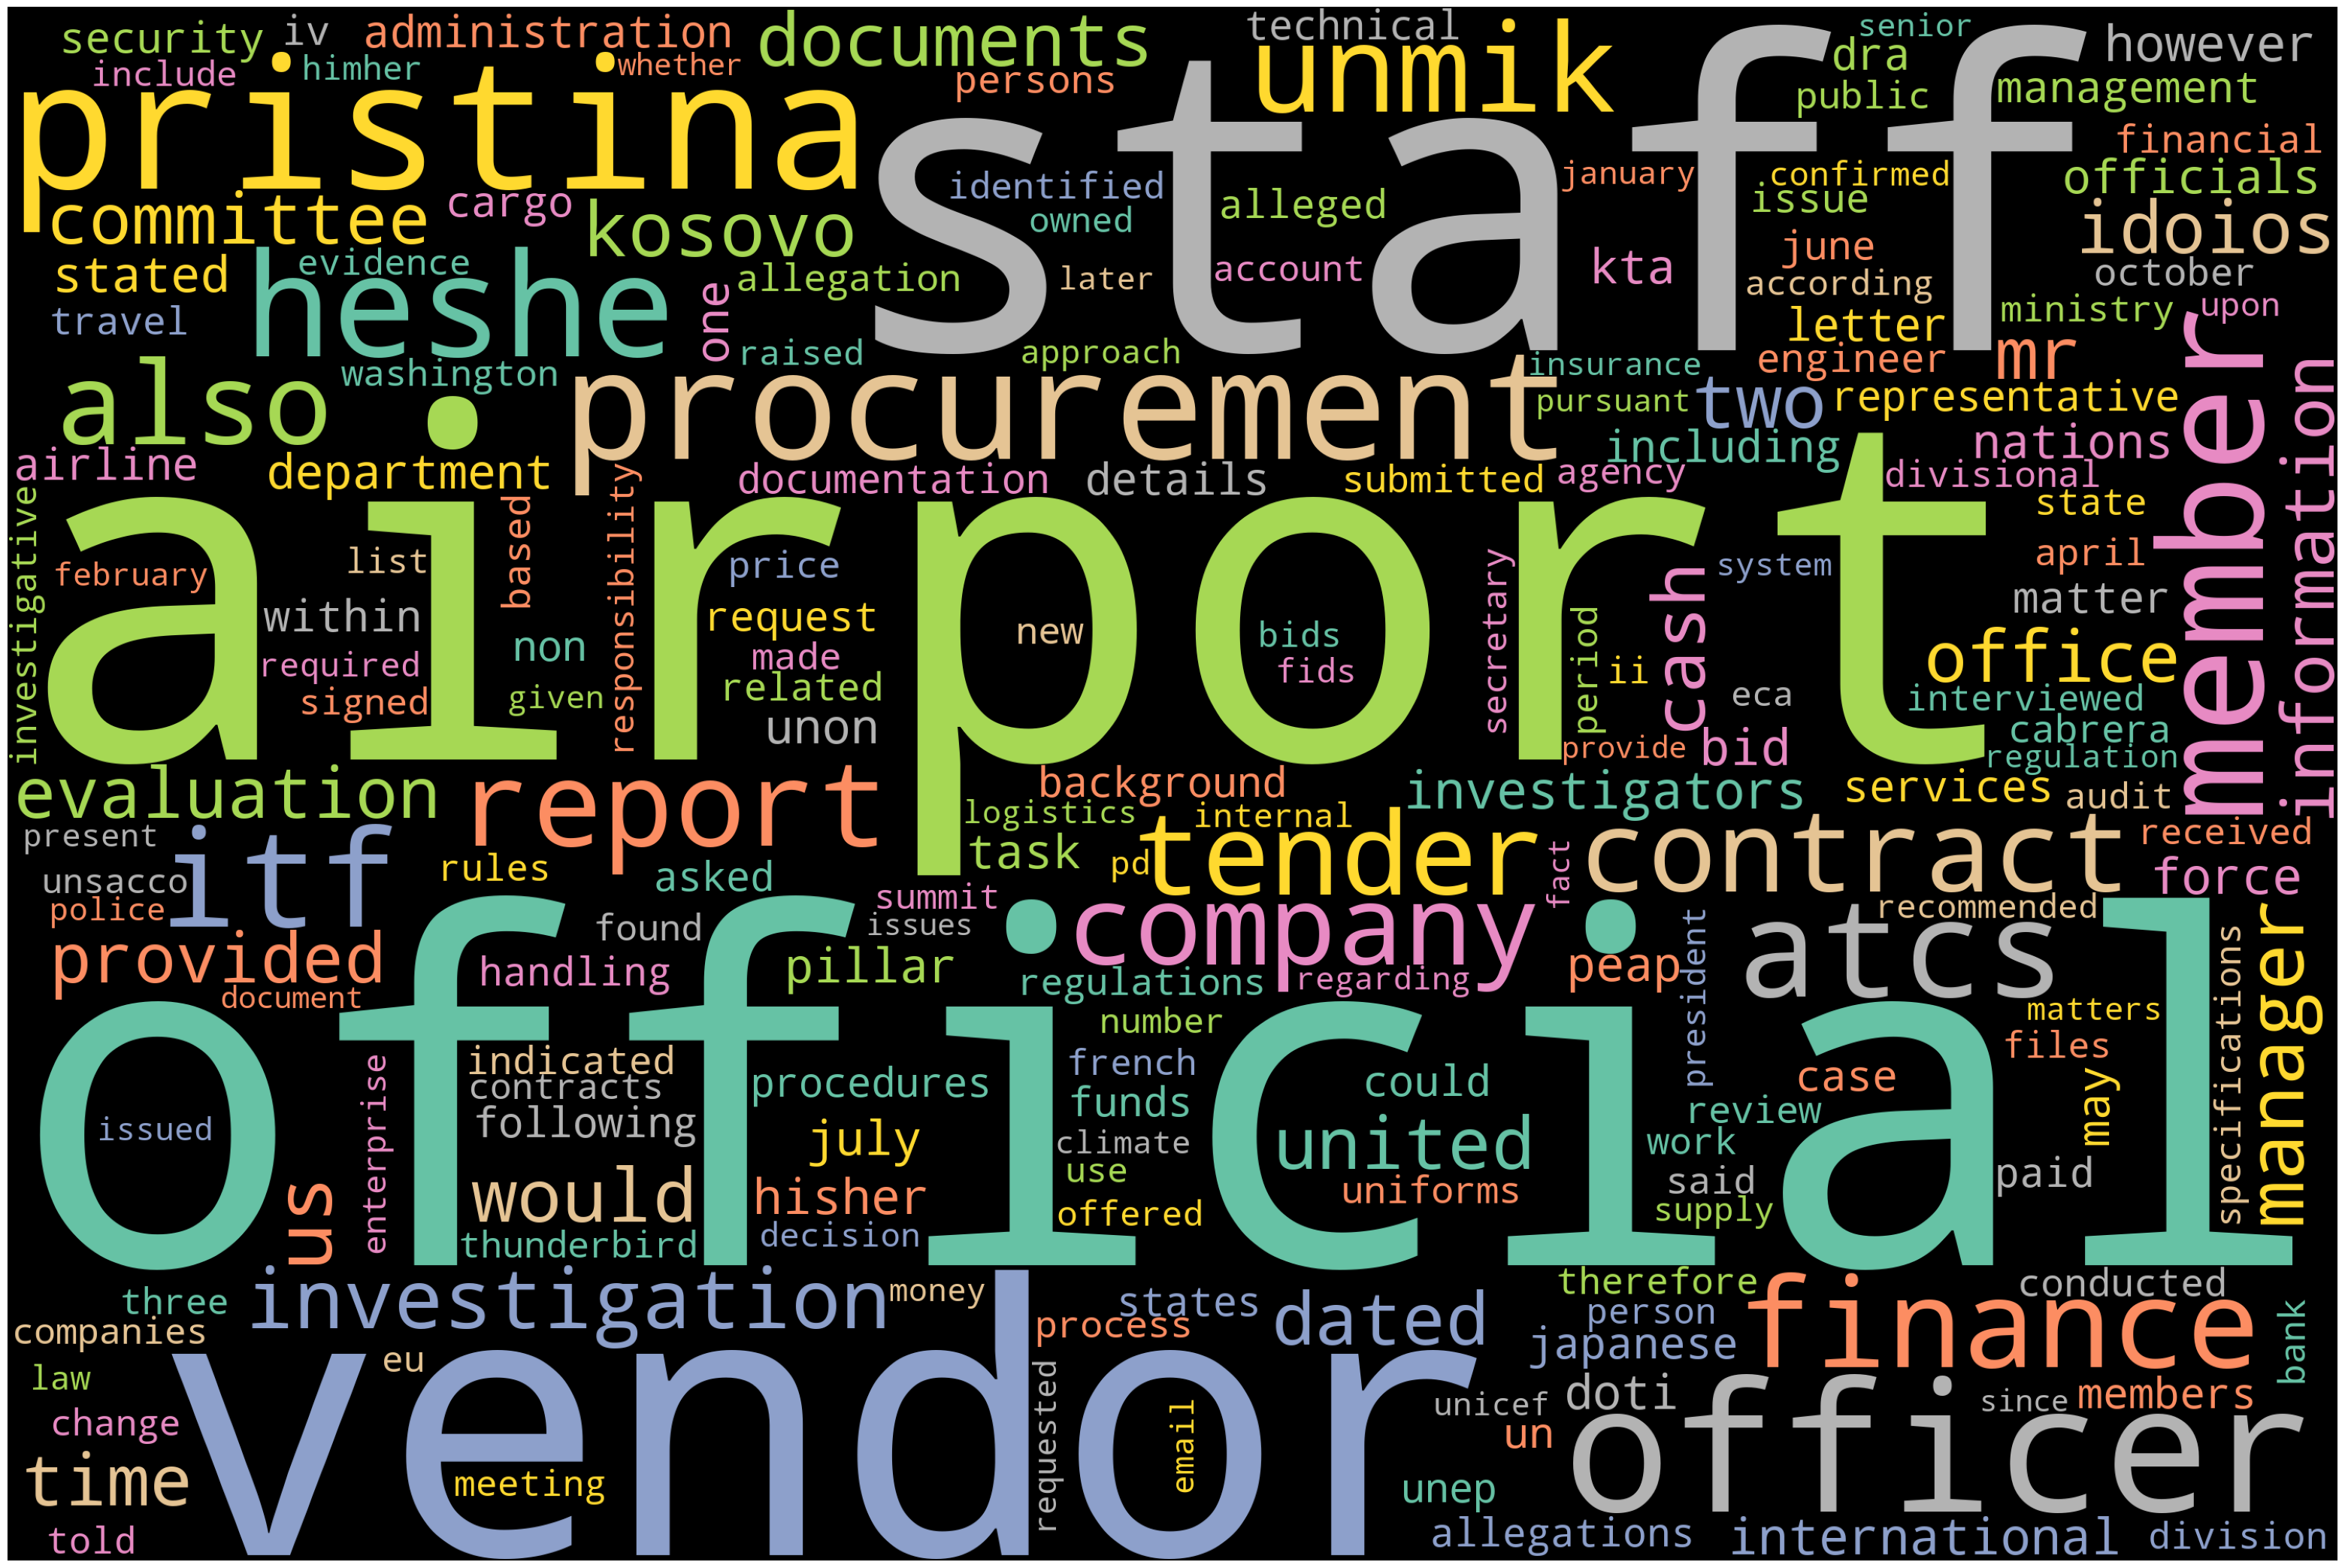

In [120]:
plot_cloud(wordcloud)